# Майнор по Анализу Данных, Группа ИАД-2
## Домашнее задание №2: Классификация текстовых данных

<hr\>
В задании вы будете решать задачу бинарной классификации текстов. Вы познакомитесь с основными инструментами sklearn, необходимыми для обработки текстов. Перед применением методов sklearn внимательно читайте документацию к ним: это полезно и помогает делать меньше ошибок.

**Общая информация**

**Срок сдачи:** 1 мая 2017, 9:00 <br\>

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com`, X = 3 или 4 (ИАД 3 или ИАД4), указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [HW2, ИАД-X] Фамилия Имя **<br\>

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.
__Старайтесь не копировать похожие участки кода. Везде, где это возможно, оформляйте код в функцию.__

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

<p>Чтобы узнать свой вариант, введите Вашу фамилию на русском языке в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
name = "БобровскихГлеб" # Ваши ФамилияИмя

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in name.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<p><b>Варианты</b></p>

В зависимости от варианта нужно будет научиться определять...

**1.** ...является ли SMS сообщение спамом? 
* Зайдите на [страничку с данными](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) на сайте репозитория UCI.
* Нажмите на «Data Folder», скачайте и распакуйте архив.
* Открыть SMSSpamCollection можно с помощью pd.read_csv, указав `sep='\t'`.

**2.** ...положительна или отрицательна рецензия на фильм?
* Зайдите на [страничку с данными](http://www.cs.cornell.edu/people/pabo/movie-review-data/) на сайте Корнельского университета.
* Нажмите на «polarity dataset v2.0» и распакуйте архив. 
* Каждый текстовый файл соответствует одной рецензии. Вам придётся [построить список всех файлов в папке](http://stackoverflow.com/questions/3207219/how-to-list-all-files-of-a-directory), а затем последовательно открыть их и прочитать тексты

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import re
def convert_text(s):
    # Removes all characters from string except letters and digits and convert letters to lowercase
    return re.sub("[^a-zA-Z0-9]", " ", s.lower())
#explain regular expression:
#

In [3]:
from os import listdir
from os.path import isfile, join
mypath = '/home/bobrg/anaconda3/txt_sentoken/pos'
onlyfiles = []
onlyfiles = [convert_text(open(join(mypath, f), 'r').read())for f in listdir(mypath)
             if isfile(join(mypath, f))]
labels = [1] * len(onlyfiles)
mypath = '/home/bobrg/anaconda3/txt_sentoken/neg'
onlyfiles.extend([convert_text(open(join(mypath, f), 'r').read()) for f in listdir(mypath)
                               if isfile(join(mypath, f))])
labels.extend([0] * (len(onlyfiles) - len(labels)))

In [4]:
len(onlyfiles)

2000

## Задача 1
#### Классификация текстовых сообщений (2 балла)

<ol>
    <li>Загрузите исходные данные --- список текстов и список соответствующих им меток</li>
    <li>Разбейте объекты на обучающее (train) и тестовое подможества (test) в пропорции 7:3</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настраивать только на обучающем подмножестве, n-gram=1, слова приведите в нижний регистр)</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Мультиномиальный наивный Байес ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации (по доле правильных классификаций) на тестовом подмножестве</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

In [5]:
random_state = 12345 # для всех объектов/методов/моделей

Параметры логистической регрессии
```
penalty='l2'
fit_intercept=True
max_iter=100
C=1
solver="lbfgs"
random_state=12345
```

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(onlyfiles, labels, test_size=0.3)

In [7]:
len(X_train) / len(onlyfiles)

0.7

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(ngram_range=(1, 1))
df = pd.DataFrame(data=count_vec.fit_transform(X_train).toarray(),
                  columns=count_vec.get_feature_names())

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(use_idf=False)
df_train = pd.DataFrame(data=transformer.fit_transform(np.asarray(df)).toarray(),
                       columns=count_vec.get_feature_names())

Another way to make transformation:

```
from sklearn.feature_extraction.text import TfidfVectorizer df_train = TfidfVectorizer(lowercase=True,        ngram_range=(1,1)).fit_transform(X_train)
```

In [10]:
df_train.head(5)

,00,000,0009f,007,05,10,100,1000,10000,100m,...,zsigmond,zucker,zuehlke,zuko,zukovsky,zulu,zundel,zurg,zwick,zzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010952,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(df_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
%timeit knc.fit(df_train, y_train)

1 loop, best of 3: 2.17 s per loop


In [12]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345)
logr.fit(df_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=12345, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
%timeit logr.fit(df_train, y_train)

1 loop, best of 3: 2.07 s per loop


In [13]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(df_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
%timeit mnb.fit(df_train, y_train)

10 loops, best of 3: 140 ms per loop


In [14]:
X_test_cnt = count_vec.transform(X_test).toarray()
df_1 = pd.DataFrame(data=X_test_cnt, columns=count_vec.get_feature_names())
df_1 = pd.DataFrame(data=transformer.transform(np.asarray(df_1)).toarray(),
                       columns=count_vec.get_feature_names())

In [15]:
yy = knc.predict(df_1)

In [16]:
%timeit knc.predict(df_1)

1 loop, best of 3: 57.4 s per loop


In [17]:
from sklearn.metrics import mean_absolute_error, accuracy_score
print(mean_absolute_error(yy, y_test))
print(accuracy_score(yy, y_test))

0.438333333333
0.561666666667


In [18]:
yy = logr.predict(df_1)

In [19]:
%timeit logr.predict(df_1)

10 loops, best of 3: 22.6 ms per loop


In [20]:
print(mean_absolute_error(yy, y_test))
print(accuracy_score(yy, y_test))

0.271666666667
0.728333333333


In [21]:
yy = mnb.predict(df_1)

In [22]:
%timeit mnb.predict(df_1)

10 loops, best of 3: 66.6 ms per loop


In [23]:
print(mean_absolute_error(yy, y_test))
print(accuracy_score(yy, y_test))

0.345
0.655


### Пояснения по результатам:

Fitting time:
* Дольше всего настраивается Логистическая регрессия, поскольку ей нужно настроить много параметров. (TODO: Expand)
* Меньше всего времени на настройку тратит модель K Nearest Neighbours, поскольку она лишь запоминает выборку.

Prediction time:
На предсказании модели ведут себя противоположно своему поведению на настройке, т.е.:
* Дольше всего предсказывает модель KNN, поскольку она должна померить расстояния евклидовой метрикой для каждого элемента из теста и каждого элемента из заученого трейна.
* Меньше времени тратит Логистическая регрессия, поскольку (TODO: Expand)

What about MNB? (TODO: Expand)

## Задача 2.
#### Применение k-folds (3 балла)

<p>1. Повторите решение задачи 1, но вместо одного разделения на обучение и контроль используйте разбиение k-folds (k=4). Вам понадобится повторить все действия 4 раза. <br>
2. Какой классификатор показывал лучшее/худшее качество на тестовой выборке? А при k-folds разбиении? Как вы думаете, обязательно ли в данной задаче оценивать качество на кросс-валидации, или достаточно отложить контрольную выборку и оценивать качество на ней?</p>

In [24]:
random_state = 12345 # для всех объектов/методов/моделей

In [48]:
from sklearn.model_selection import KFold
def kfold(model, data, labels, k):
    kfld = KFold(n_splits=k, random_state=12345)
    y_pred = np.zeros(len(labels))
    for i_train, i_test in kfld.split(data):
        print(i_train)
        X_train, X_test = data[i_train], data[i_test]
        y_train = labels[i_train]
        model.fit(X_train, y_train)
        y_pred[i_test] = model.predict(X_test)
    print(accuracy_score(y_pred, labels))

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer 
#to reduce code :D

In [27]:
tfidfvec = TfidfVectorizer(lowercase=True, ngram_range=(1,1))
tmp = tfidfvec.fit_transform(onlyfiles)

In [49]:
print('-------------------KNN--------------------')
kfold(knc, np.asarray(df_train), np.asarray(labels), 4)
print('-------------------LR--------------------')
kfold(logr, np.asarray(df_train), np.asarray(labels), 4)
print('-------------------MNB--------------------')
kfold(mnb, np.asarray(df_train), np.asarray(labels), 4)

-------------------KNN--------------------
[ 350  351  352 ..., 1397 1398 1399]
[   0    1    2 ..., 1397 1398 1399]
[   0    1    2 ..., 1397 1398 1399]
[   0    1    2 ..., 1047 1048 1049]
0.614
-------------------LR--------------------
[ 350  351  352 ..., 1397 1398 1399]
[   0    1    2 ..., 1397 1398 1399]
[   0    1    2 ..., 1397 1398 1399]
[   0    1    2 ..., 1047 1048 1049]
0.8
-------------------MNB--------------------
[ 350  351  352 ..., 1397 1398 1399]
[   0    1    2 ..., 1397 1398 1399]
[   0    1    2 ..., 1397 1398 1399]
[   0    1    2 ..., 1047 1048 1049]
0.8


### Пояснения по результатам:

KFold разбиение на 4 фолдах улучшело результат предсказания моделей, но если с KNN (при k = 5) улучшение заметное, то с Логистической регрессией и Наивным Байесом улучшения едва заметны.
(WHY? TODO: Expand)

## Задача 3.
#### Выбор модели (5 баллов)

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Рассмотрим следующие варианты значений гиперпараметров для наших классификаторов:  </p>

<p>K-ближайших соседей</p>

In [29]:
ns = np.arange(1, 150, 20) # количество соседей

<p>Логистическая регрессия</p>

In [30]:
cs = np.logspace(-2, 10, 8, base=10) # параметр регуляризации

<p>Мультиномиальный наивный Байес</p>

In [31]:
alphas = np.logspace(-4, 1, 8, base=10) # сглаживающий параметр

In [32]:
kfld=KFold(n_splits=4, random_state=12345)
index = []
for i_tr,i_tst in kfld.split(X_train):
    index.append(i_tr)

<p style="padding-left:15px;"> Найдите оптимальные значения гиперпараметров для классификаторов на кросс-валидации. Для этого постройте графики (гиперпараметр)-(качество) на обучении и валидации. <br> _Пояснение:_ вы разбили обучающую выборку на 4 блока. Для каждого значения гиперпараметра 4 раза повторите следующее: берем 3 блока для обучения, по ним настраиваем  TfIdf и обучаем классификатор, считаем качество на этих блоках (качество на обучении) и на оставшемся (качество на валидации). Итоговое значение качества на обучении для данного значения гиперпараметра - это среднее четырех полученных значений качества на обучении, то же самое с итоговым значением качества на валидации.  <br>
3. 3 настроенные модели обучите на всем обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
4. Повторите шаги 2-4 для n-gram=2<br>
5. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)<br>
6. Сделайте выводы по полученным результатам: <ul>
<li>какой метод показал наилучшее качество на обучении? на валидации? на тестовой выборке? Если это разные классификаторы, подумайте, почему так происходит. Если один и тот же, в чем его преимущества перед остальными?</li>
<li>велика ли разница между качеством на обучении и на валидации? на валидации и контроле? Почему так происходит?</li>
<li>что означает n-gram=2? Улучшилось ли качество при переходе от n-gram=1 к n-gram=2? Предложите свои идеи, почему.</li>
<li>есть ли связь между качеством классификации и временем обучения/предсказания? какой классификатор обучается медленнее всего? медленнее всего делает предсказания? В чем причина?</li>
</ul></p>

In [33]:
random_state = 12345 # для всех объектов/методов/моделей

In [59]:
def hyperparams_info(model, data, labels, index):
    qual_train = []
    qual_valid = []
    for i_tr, i_tst in kfld.split(data):
        tfidfvec = TfidfVectorizer(lowercase=True, ngram_range=(1,1))
        tmp = tfidfvec.fit_transform(data[i_tr])
        model.fit(tmp, labels[i_tr])
        qual_train.append(accuracy_score(model.predict(tmp), labels[i_tr]))
        qual_valid.append(accuracy_score(model.predict(tfidfvec.transform(data[i_tst])), labels[i_tst]))
        #print('-train indexes:', i_tr,
        #      '-validation indexes: ', i_tst, 
        #      '-train accuracy score: ', qual_train[-1],
        #      '-validation accuracy score: ', qual_valid[-1], sep='\n')
        #print()
    print('---------------------result---------------------')
    print('-mean train: ', np.mean(qual_train))
    print('-mean validation: ', np.mean(qual_valid))
    return np.mean(qual_train), np.mean(qual_valid)

In [60]:
#KNearestNeighbors
qual_train = [0]*len(ns)
qual_valid = [0]*len(ns)

j = 0
for i in ns:
    print('\nKNN', 'n_neighbors=', i)
    knn = KNeighborsClassifier(n_neighbors=i)
    qual_train[j], qual_valid[j] = hyperparams_info(knn, np.asarray(X_train), np.asarray(labels), index)
    j += 1


KNN n_neighbors= 1
---------------------result---------------------
-mean train:  0.999523809524
-mean validation:  0.351428571429

KNN n_neighbors= 21
---------------------result---------------------
-mean train:  0.729761904762
-mean validation:  0.666428571429

KNN n_neighbors= 41
---------------------result---------------------
-mean train:  0.715714285714
-mean validation:  0.701428571429

KNN n_neighbors= 61
---------------------result---------------------
-mean train:  0.715238095238
-mean validation:  0.71

KNN n_neighbors= 81
---------------------result---------------------
-mean train:  0.714761904762
-mean validation:  0.714285714286

KNN n_neighbors= 101
---------------------result---------------------
-mean train:  0.714285714286
-mean validation:  0.714285714286

KNN n_neighbors= 121
---------------------result---------------------
-mean train:  0.714285714286
-mean validation:  0.714285714286

KNN n_neighbors= 141
---------------------result---------------------
-mean t

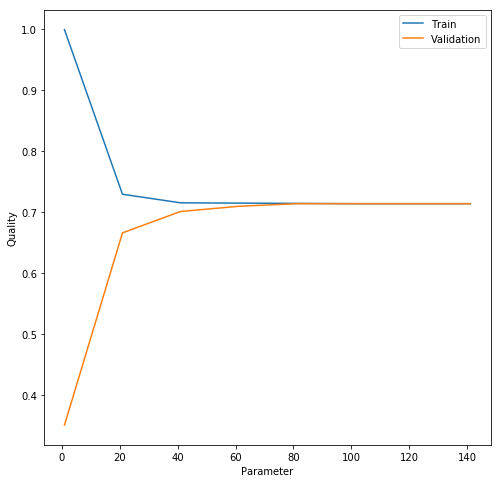

In [86]:
fig1 = plt.figure(figsize=(8,8))
ax1 = plt.subplot()
ax1.plot(ns, qual_train, label='Train')
ax2 = plt.subplot()
ax2.plot(ns, qual_valid, label='Validation')
plt.legend(loc=1, ncol=1)
plt.xlabel('Parameter')
plt.ylabel('Quality')

При одном соседе модель просто выучила обучающую выборку и очень плохо отработала на валидации, что и ожидаемо.

In [47]:
#LogisticRegression
for i in cs:
    print()
    print('Logistic regression', 'C=', i)
    logr = LogisticRegression(C=i)
    hyperparams_info(logr, np.asarray(X_train), np.asarray(labels), index)


Logistic regression C= 0.01
[ 350  351  352 ..., 1397 1398 1399]


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
#MultinomialNB
for i in alphas:
    print()
    print('MNB', 'alpha=', i)
    mnb = MultinomialNB(alpha=i)
    hyperparams_info(mnb, np.asarray(X_train), np.asarray(labels), index)

[some info about choosing n-grams and cv](https://stats.stackexchange.com/questions/155483/estimating-the-best-length-of-n-gram) <br> </br>
что означает n-gram=2?
если n-gram=1 будет считать вероятность встретить определенное слово, то n-gram=2 будет парсить строку на посл-ти из двух слов.
(перекрест в одно слово: … to be or not to be …	=> …, to be, be or, or not, not to, to be, …)

## Задача 4. (опционально)
#### Исследование влияния количества признаков FeatureHasher на качество классификации (+3 балла к сумме по всем ДЗ) 

<p>Изучите, что такое feature hashing (достаточно разобаться с документацией sklearn) и кратко опишите. Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [ ]:
n_features = np.logspace(1, 5, 5, base=10) # количество признаков
non_negative=True

<p>В этом задании можно воспользоваться GridSearchCV</p>

# Задача 5. (опционально)
__Простой прототип (+ 2 балла к сумме по всем ДЗ)__

Напишите функцию, которая берет на вход произвольную строку и возвращает для нее предсказание для вашей задачи. Придумайте по 3 примера строк для положительного и отрицательного класса, сделайте для них предсказание. Совпадают ли ваши метки и предсказания классификатора? Оцените (любым способом), насколько придуманные вами тексты похожи на объекты датасета, с которым вы работали.


In [ ]:
def predict_class_for_text(s):
    pass